In [1]:
from IPython.display import display
import spot
spot.setup()

# Definitions and examples

In Spot a **Parity acceptance** is defined by an **kind**, a **style** and a **numsets** (number of acceptance sets):
+ The **numsets** is the number of acceptance sets used by the parity acceptance.
+ The **kind** can be either **max** or **min**. The parity kind is well defined only if the **numsets** is strictly greater than 1.
    - **max** odd 4: *Inf(3) | (Fin(2) & (Inf(1) | Fin(0)))*
    - **min** odd 4: *Fin(0) & (Inf(1) | (Fin(2) & Inf(3)))*
+ The **style** can be either **odd** or **even**. The parity style is well defined only if the **numsets** is non-null.
    - max **odd** 4: *Inf(3) | (Fin(2) & (Inf(1) | Fin(0)))*
    - min **even** 4: *Fin(3) & (Inf(2) | (Fin(1) & Inf(0)))*



**Some parity acceptance examples:**
<div align="center">
**numsets = 1:** 
</div>

|           |    **max**     |     **min**    |
|:---------:|:--------------:|:--------------:|
|  **odd**  |     Fin(1)     |     Fin(1)     |      
|  **even** |     Inf(0)     |     Inf(0)     |

<br>
<div align="center">
**numsets = 2:** 
</div>

|           |       **max**        |        **min**       |
|:---------:|:--------------------:|:--------------------:|
|  **odd**  | Inf(1) &#124; Fin(0) | Fin(1) & Inf(0)      |      
|  **even** | Fin(0) & Inf(1)      | Inf(0) &#124; Fin(1) |


<br>
<div align="center">
**numsets = 3:** 
</div>
 
|           |             **max**             |             **min**             |
|:---------:|:-------------------------------:|:-------------------------------:|
|  **odd**  | Fin(2) & (Inf(1) &#124; Fin(0)) | Inf(2) &#124; (Fin(1) & Inf(0)) |      
|  **even** | Fin(0) & (Inf(1) &#124; Fin(2)) | Inf(0) &#124; (Fin(1) & Inf(2)) |

<br>
<div align="center">
**numsets = 4:** 
</div>

|           |                      **max**                    |                      **min**                    |
|:---------:|:-----------------------------------------------:|:-----------------------------------------------:|
|  **odd**  | Inf(3) &#124; (Fin(2) & (Inf(1) &#124; Fin(0))) | Fin(3) & (Inf(2) &#124; (Fin(1) & Inf(0)))      |      
|  **even** | Fin(0) & (Inf(1) &#124; (Fin(2) & Inf(3)))      | Inf(0) &#124; (Fin(1) & (Inf(2) &#124; Fin(3))) |

<br>
According to the given examples, we can remark that:
+ Given a parity **max**: Acceptance sets with greater indexes are more significant
+ Given a parity **min**: Acceptance sets with lower indexes are more significant

# Change parity

## To toggle **style**
### A new acceptance set is introduced and all the existing sets' indexes are increased by 1.
#### Parity max odd 5 -> Parity max even
If the acceptance is a parity **max**, all the transitions that do not belong to any acceptance set will belong to the new set.

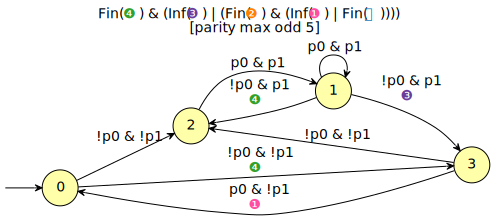

In [2]:
aut_max_odd5 = tuple(spot.automata("randaut -A 'parity max odd 5' -Q4 2|"))[0]
display(aut_max_odd5.show(".a"))

The new indexes of the acceptance sets:
+ 4 -> 5
+ 3 -> 4
+ 2 -> 3
+ 1 -> 2
+ 0 -> 1
+ ∅ -> 0

#### Result of Parity max odd 5 -> Parity max even 6

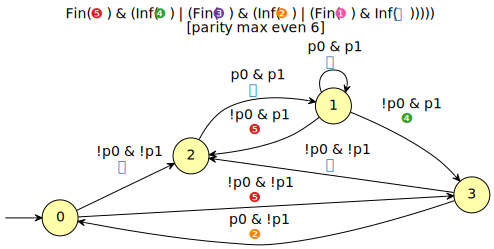

In [3]:
aut_max_odd5_to_even = spot.change_parity(aut_max_odd5, spot.parity_kind_any, spot.parity_style_even)
display(aut_max_odd5_to_even.show(".a"))

#### Parity min odd 5 -> Parity min even
If the acceptance is a parity **min**, the new acceptance set will not be used.

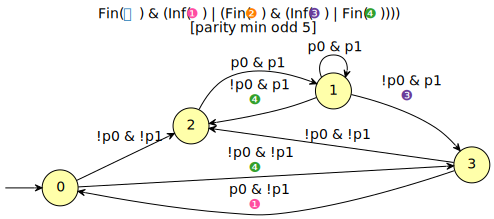

In [4]:
aut_min_odd5 = tuple(spot.automata("randaut -A 'parity min odd 5' -Q4 2|"))[0]
display(aut_min_odd5.show(".a"))

The new indexes of the acceptance sets:
+ 4 -> 5
+ 3 -> 4
+ 2 -> 3
+ 1 -> 2
+ 0 -> 1
+ ∅ -> ∅

#### Result of Parity min odd 5 -> Parity min even 6

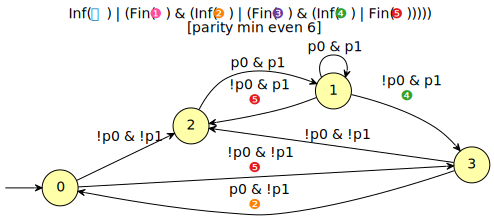

In [5]:
aut_min_odd5_to_even = spot.change_parity(aut_min_odd5, spot.parity_kind_any, spot.parity_style_even)
display(aut_min_odd5_to_even.show(".a"))

### To toggle **kind**
#### The indexes of the acceptance sets are reversed
#### Parity max odd 5 ----> Parity min:

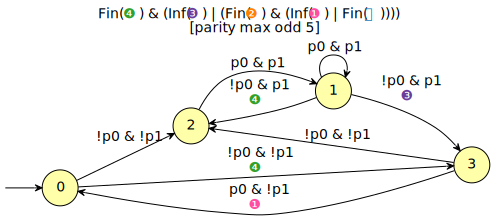

In [6]:
aut_max_odd5 = tuple(spot.automata("randaut -A 'parity max odd 5' -Q4 2|"))[0]
display(aut_max_odd5.show(".a"))

The new indexes of the acceptance sets:
+ 4 -> 0
+ 3 -> 1
+ 2 -> 2
+ 1 -> 3
+ 0 -> 4
+ ∅ -> ∅

#### Result of Parity max odd 5 ----> Parity min odd 5:

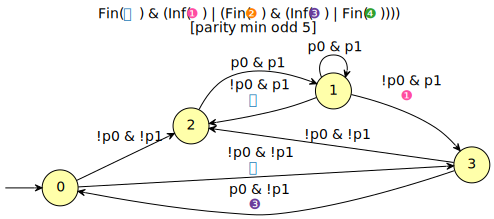

In [7]:
aut_max_odd5_to_min = spot.change_parity(aut_max_odd5, spot.parity_kind_min, spot.parity_style_any)
display(aut_max_odd5_to_min.show(".a"))

#### Parity max odd 4 ----> Parity min odd:

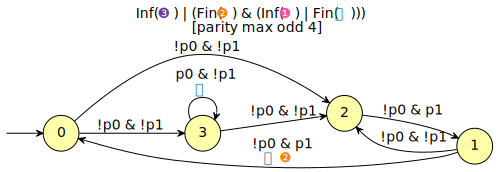

In [8]:
aut_max_odd4 = tuple(spot.automata("randaut -A 'parity max odd 4' -Q4 2|"))[0]
display(aut_max_odd4.show(".a"))

The new indexes of the acceptance sets:
+ 3 -> 0
+ 2 -> 1
+ 1 -> 2
+ 0 -> 3
+ ∅ -> ∅

#### Result of Parity max odd 4 ----> Parity min even 4:

If the **numsets** is even and the **kind** is toggled, then the **style** will be toggled too.

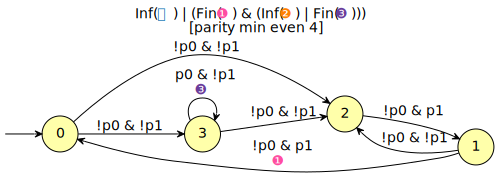

In [9]:
aut_max_odd4_to_min = spot.change_parity(aut_max_odd4, spot.parity_kind_min, spot.parity_style_any)
display(aut_max_odd4_to_min.show(".a"))

To keep the same **style** a new acceptance set is introduced, thus the **style** is toggled once again.
<br>
The new indexes of the acceptance sets are:

+ 3 -> 0 -> 1
+ 2 -> 1 -> 2
+ 1 -> 2 -> 3
+ 0 -> 3 -> 4
+ ∅ -> ∅ -> 0 (as the resulting automaton is a parity min)

#### Result of Parity max odd 4 ----> Parity min even 5:

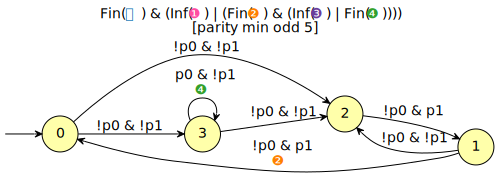

In [10]:
aut_max_odd4_to_min_bis = spot.change_parity(aut_max_odd4, spot.parity_kind_min, spot.parity_style_same)
display(aut_max_odd4_to_min_bis.show(".a"))

# Colorize parity
An automaton with a parity acceptance is not necessarily a parity automaton. It must be colored to be qualified like this.
## Parity max
Transitions with multiple acceptance sets are purified by keeping only the set with the greatest index.
<br>
If there is a transition that do not belong to any acceptance set, a new acceptance set is introduced at the least significant place.
<br>
The least significant place of a parity max acceptance is where the indexes are the lowest, so all the existing acceptance sets' indexes will be shifted.
#### Colorize parity max odd 4

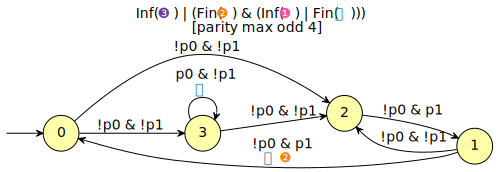

In [11]:
aut_max_odd4 = tuple(spot.automata("randaut -A 'parity max odd 4' -Q4 2|"))[0]
display(aut_max_odd4.show(".a"))

The new acceptance sets are:
+ ∅ -> 0
+ 0 -> 1
+ 1 -> 2
+ 2 -> 3
+ 3 -> 4

#### The result of colorizing the given parity max odd 4 is

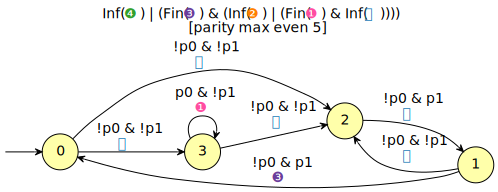

In [12]:
aut_max_odd4_colored = spot.colorize_parity(aut_max_odd4, False)
display(aut_max_odd4_colored.show(".a"))

You can notice that the **style** has been toggled.
<br>
To prevent colorize_parity from this we can add one extra acceptance set in the acceptance condition.

The new acceptance sets are now:
+ ∅ -> 1
+ 0 -> 2
+ 1 -> 3
+ 2 -> 4
+ 3 -> 5
#### The result of colorizing the given parity max odd 4 without changing the style is

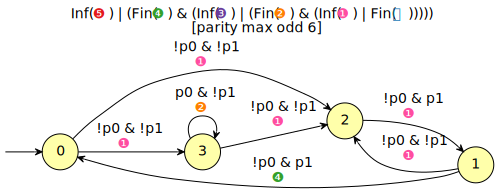

In [13]:
aut_max_odd4_colored_bis = spot.colorize_parity(aut_max_odd4, True)
display(aut_max_odd4_colored_bis.show(".a"))

## Parity min
Transitions with multiple acceptance sets are purified by keeping only the set with the lowest index.
<br>
If there is a transition that do not belong to any acceptance set, a new acceptance set is introduced at the least significant place.
<br>
The least significant place of a parity min acceptance is where the indexes are the greatest.
#### Colorize parity min odd 4

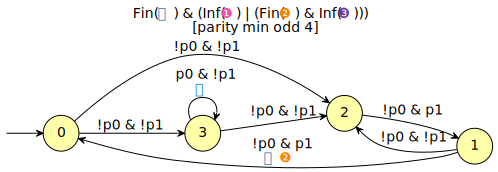

In [14]:
aut_min_odd4 = tuple(spot.automata("randaut -A 'parity min odd 4' -Q4 2|"))[0]
display(aut_min_odd4.show(".a"))

The new acceptance sets are:
+ ∅ -> 4
+ 0 -> 0
+ 1 -> 1
+ 2 -> 2
+ 3 -> 3

#### The result of colorizing the given parity max odd 4 is

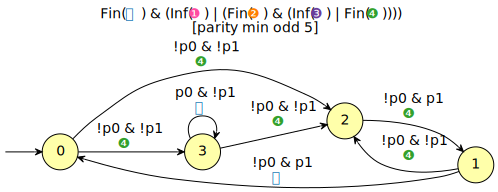

In [15]:
aut_min_odd4_colored_bis = spot.colorize_parity(aut_min_odd4, True)
display(aut_min_odd4_colored_bis.show(".a"))

Remark: colorizing a parity min won't change the **style** of the acceptance.